## Esercitazione 5  del    19 Marzo 2024 


In [32]:
# importazione librerie
import sympy as sym
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt
import numpy as np
import math
# usato per creare la sommatoria
import sympy as sp

## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=0,..,10

- Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
      condizionato per tutti i valori di q assegnati;

- Si calcoli la soluzione x dell'equazione mediante la formula risolutiva indicata al punto precedente e si dica se l'algoritmo di calcolo risulta numericamente
stabile  per i valori di q assegnati

- si individui una forma stabile per il calcolo della soluzione e si verifichi se l'algoritmo di calcolo risulta numericamente stabile per i valori di q assegnati.

In [7]:
# assegno il simbolo
q = sym.symbols('q')
p = 10.0**5
# è questo f(q)
f = -p+(p**2 + q)**(1/2)

df = sym.diff(f,q,1) 
df_numerica = lambdify(q,df,np)
f_numerica=lambdify(q,f,np)
z = 10.0**-(np.arange(11))
print(z)
sol_df = df_numerica(z)
sol = f_numerica(z)
print(sol)
#print(sol_df)


ind_cond = [ np.abs(sol_df[i]*z[i])/np.abs(sol[i]) for i in range(len(z)) ]
print(ind_cond)
# dai risultati sembra ben condizionato
# però i risultati della soluzione data per certi
# q diventano valori più piccoli dello spacing in p**2
# perciò è instabile

#la formula stabile, si ottiene moltiplicando
#la formula di partenza per 
# (+p+sqrt{p^2+q})/(+p+sqrt{p^2+q})
x2= z/(p+np.sqrt(p**2+z))
print(x2)

[1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09
 1.e-10]
[4.99999442e-06 5.00003807e-07 5.00003807e-08 4.99130692e-09
 4.94765118e-10 4.36557457e-11 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[1.000001116607014, 0.9999923855596102, 0.9999923855641101, 1.0017416433818742, 1.0105805402352894, 1.1453246122666663, inf, inf, inf, inf, inf]
[5.e-06 5.e-07 5.e-08 5.e-09 5.e-10 5.e-11 5.e-12 5.e-13 5.e-14 5.e-15
 5.e-16]


C:\Users\utente1\AppData\Local\Temp\ipykernel_20816\1128493357.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  ind_cond = [ np.abs(sol_df[i]*z[i])/np.abs(sol[i]) for i in range(len(z)) ]


## Esercizio 2

Realizzate un codice python che implementa il seguente algoritmo. Si tratta dell'implementazione del  metodo di Archimede per l'approssimazione di pi-greco e genera una successione di valori $p_i$, i=1,n, (n scelto dall'utente) che tende a $\pi$. Verificare se all'aumentare di n, la successione $p_i$ tende a $\pi$.

b[0]=2

s[0]=1

for i in range(1,n):

    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
     s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)

- Visualizzate su un grafico gli elementi della successione p[i] calcolata Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i], - considerando come valore esatto di pigreco il valore math.pi.

- Giustificate i risultati alla luce della teoria.

- Proponete una versione stabile dell'algoritmo

- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i] prodotta dall'algoritmo stabilizzato, considerando come valore esatto di
pigreco il valore math.pi.

[0.         2.         2.82842712 3.06146746 3.12144515 3.13654849
 3.14033116 3.14127725 3.1415138  3.14157294 3.14158773 3.14159142
 3.14159235 3.14159258 3.14159263 3.14159265 3.14159265 3.14159261
 3.14159291 3.14159413 3.14159655 3.14159655 3.14167427 3.14182968
 3.14245127 3.14245127 3.16227766 3.16227766 3.46410162 4.
 0.         0.         0.         0.        ]


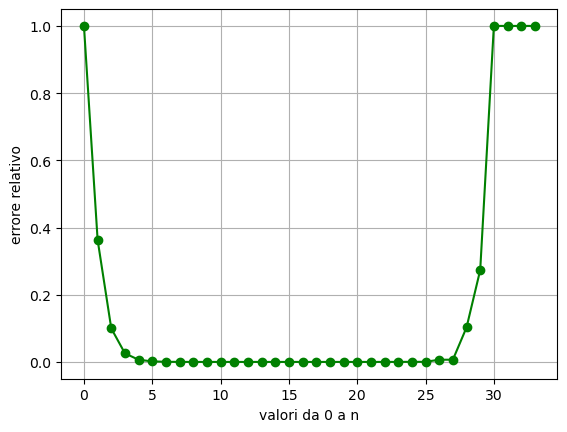

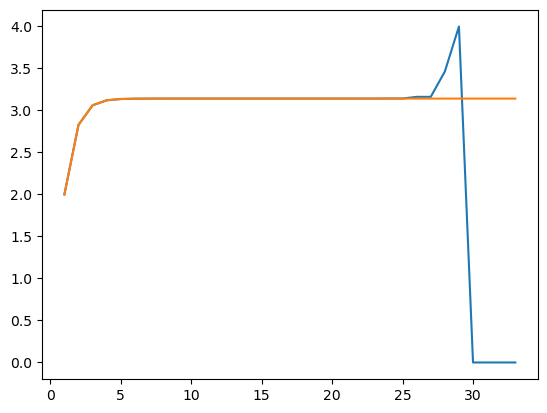

In [30]:
# codice scritto nel caso in cui è l'utente a
# decidere che numero di iterazione dare
# int(input("Inserisci un numero naturale: "))
n = 34


b = np.zeros(n)
s = np.zeros(n)
p = np.zeros(n)

b[0]=2
s[0]=1

for i in range(1,n):
    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
    s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)

print(p)

err_rel1 = [ np.abs(p[i]-math.pi)/np.abs(math.pi) for i in range(n) ]

plt.plot(range(n), err_rel1, 'g-o')
plt.grid(True)
plt.xlabel('valori da 0 a n')
plt.ylabel('errore relativo')
plt.show()

# dai risultati grafici si nota che dalle 0 a 5 iterazioni
# l'errore dell'algoritmo per ricreare pi-greco inizia a
# scendere, da 5 a 25 iter. non c'è nessun errore
# e poi da 25 iter. in poi inizia a risalire l'errore
# questo perchè l'algorimo non è stabile per la
# propagazione di errori dovuta dalle operazioni
# di sottrazione

bs=np.zeros((n,))
ss=np.zeros((n,))
ps=np.zeros((n,))
bs[0]=2
ss[0]=1
for i in range(1,n):
     ps[i]=bs[i-1]*ss[i-1]
     bs[i]=2*bs[i-1]
     ss[i]=ss[i-1]/math.sqrt((2.0*(1.0+math.sqrt(1.0-ss[i-1]**2))))
        
plt.plot(np.arange(1,n),p[1:n],np.arange(1,n),ps[1:n])

## Esercizio 3   
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$.



In [39]:
#k = sp.symbols('k')
#x = sp.symbols('x')
N = 100
k = np.arange(N+1,dtype=int)
e = 1

for i in range(1, N+1):
    e = e + (x**k)/math.factorial(k[i])


print(f"La sommatoria di e^x: {e}")


La sommatoria di e^x: [4299778907798767752801199122242037634663518280784714275131782813346597523870956720660008227544949996496057758175050906671347686438130409774741771022426508339/1581800261761765299689817607733333906622304546853925787603270574495213559207286705236295999595873191292435557980122436580528562896896000000000000000000000000
 2717978646037002453111381514508703728041213733930788487528512238851383964663670015423712227949076805203622200194928470090819123541234409774741771022426508339*x/1581800261761765299689817607733333906622304546853925787603270574495213559207286705236295999595873191292435557980122436580528562896896000000000000000000000000 + 1
 2717978646037002453111381514508703728041213733930788487528512238851383964663670015423712227949076805203622200194928470090819123541234409774741771022426508339*x**2/1581800261761765299689817607733333906622304546853925787603270574495213559207286705236295999595873191292435557980122436580528562896896000000000000000000000000 + 1
 27179786460

## Esercizio 4
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

## Esercizio 5
Valutazione di un polinomio in un vettore di punti
-   Realizzare una function  che mediante lo schema di Horner  valuti un polinomio in un vettore di punti.
-   Realizzare una function  che utilizzi l’algoritmo classico per valutare un polinomio in un vettore di punti.
-   Valutare   i seguenti polinomi, con i due metodi implementati nei punti precedenti,  sul vettore di punti specificato  e  rappresentarli graficamente. Confrontarne i tempi 

         p(x)=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256  da valutare su vettore di  1000000 punti equidistanti in [1.8,2.2]
         p(x)= x^11 –8 x^9 +28 x^6 –7 x^4 +12 x^3 –4 x +1   da valutare su vettore di 1000000  punti in [-5:5]
         
Cosa conferma questo esperimento?


## Esercizio 6
Realizzare un codice python che calcola il valore del polinomio p(x)=(x-2)^8 utilizzando le formule

    p=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256;
    p(x)=(x-2)^8
    e lo schema di Horner

e ne realizza il grafico in un vettore di 10000 equidistanti nell’intervallo [1.8,2.2], [1.9, 2.1],  [1.92,2.08], [1.93,2.07], [1.94,2.06] Spiegare il comportamento osservato. Cosa succede al restringersi dell’intervallo intorno al valore 2, punto in cui questo polinomio si annulla?
